# Preprocessing 

In [1]:
pwd

'/Users/andrewstephens/Final_project/Preprocessing'

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 
from scipy import stats
from sklearn.preprocessing import PowerTransformer,MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
cd ..

/Users/andrewstephens/Final_project


In [3]:
cd Data 

/Users/andrewstephens/Final_project/Data


In [4]:
df = pd.read_csv('EDA.csv', index_col=0)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Reducing Features 

It is now time to remove any feature with a correlation of > 80%. Because in the correlation matrix, we saw how highly the company's internal statistics were such as employee variation rate. 

emp.var.rate, & nr.employed 

In [6]:
df = df.drop('emp.var.rate', axis=1)

In [7]:
df = df.drop('euribor3m',axis = 1)

In [8]:
# dropping this variable to make the prediction more applicable, per UCI repository. 
df = df.drop('duration',axis=1)

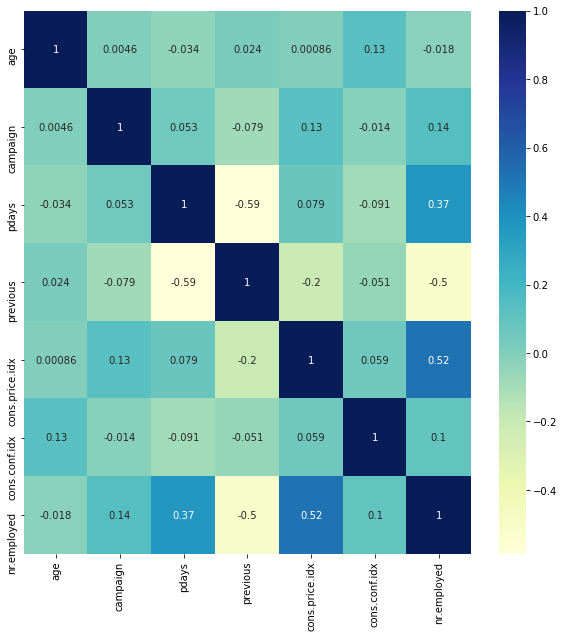

In [9]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap="YlGnBu")

plt.show()

Wanted to visualize what our corr matrix looked like after we dropped features. Pdays & Previous look interesting. 

# Data Manipulation

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,5191.0,no


# Handling Categorical Data 

Because most of the variables we are working with are categorical we will be using 1 hot encoding to satisfy the mathmatical equations that our model will be solving for 


In [11]:
columns=df.select_dtypes(include=[object]).columns
df=pd.concat([df,pd.get_dummies(df[columns])],axis=1)
df=df.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   cons.price.idx                 41188 non-null  float64
 5   cons.conf.idx                  41188 non-null  float64
 6   nr.employed                    41188 non-null  float64
 7   y                              41188 non-null  object 
 8   job_admin.                     41188 non-null  uint8  
 9   job_blue-collar                41188 non-null  uint8  
 10  job_entrepreneur               41188 non-null  uint8  
 11  job_housemaid                  41188 non-null  uint8  
 12  job_management                 41188 non-null 

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,job_admin.,job_blue-collar,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0
1,57,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0
3,40,1,999,0,93.994,-36.4,5191.0,no,1,0,...,0,1,0,0,0,0,1,0,1,0
4,56,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0


In [12]:
pwd

'/Users/andrewstephens/Final_project/Data'

In [13]:
df.to_csv('Preprocessing.csv')